# Creating a mushroom classifier

In [13]:
import matplotlib.pyplot as plt 
import seaborn           as sns
import pandas            as pd
import numpy             as np

# Feature mapping
_attr = {'class':                   {'e':'edible', 'p':'poisonous'},
        'cap-shape':                {'b':'bell', 'c':'conical', 'x':'convex', 'f':'flat', 'k':'knobbed', 's':'sunken'},
        'cap-surface':              {'f':'fibrous', 'g':'grooves', 'y':'scaly', 's':'smooth'},
        'cap-color':                {'n':'brown', 'b':'buff', 'c':'cinnamon', 'g':'gray', 'r':'green', 'p':'pink', 'u':'purple', 'e':'red', 'w':'white', 'y':'yellow'},
        'gill-attachment':          {'a':'attached', 'd':'descending', 'f':'free', 'n':'notched'},
        'gill-spacing':             {'c':'close', 'w':'crowded', 'd':'distant'},
        'gill-size':                {'b':'broad', 'n':'narrow'},
        'gill-color':               {'k':'black', 'n':'brown', 'b':'buff', 'h':'chocolate', 'g':'gray', 'r':'green', 'o':'orange', 'p':'pink', 'u':'purple', 'e':'red', 'w':'white', 'y':'yellow'},
        'stalk-shape':              {'e':'enlarging', 't':'tapering'},
        'stalk-root':               {'b':'bulbous', 'c':'club', 'u':'cup', 'e':'equal', 'z':'rhizomorphs', 'r':'rooted', '?':np.nan},
        'stalk-surface-above-ring': {'f':'fibrous', 'y':'scaly', 'k':'silky', 's':'smooth'},
        'stalk-surface-below-ring': {'f':'fibrous', 'y':'scaly', 'k':'silky', 's':'smooth'},
        'stalk-color-above-ring':   {'n':'brown', 'b':'buff', 'c':'cinnamon', 'g':'gray', 'o':'orange', 'p':'pink', 'e':'red', 'w':'white', 'y':'yellow'},
        'stalk-color-below-ring':   {'n':'brown', 'b':'buff', 'c':'cinnamon', 'g':'gray', 'o':'orange', 'p':'pink', 'e':'red', 'w':'white', 'y':'yellow'},
        'veil-type':                {'p':'partial', 'u':'universal'},
        'veil-color':               {'n':'brown', 'o':'orange', 'w':'white', 'y':'yellow'},
        'ring-number':              {'n':'none', 'o':'one', 't':'two'},
        'ring-type':                {'c':'cobwebby', 'e':'evanescent', 'f':'flaring', 'l':'large', 'n':'none', 'p':'pendant', 's':'sheathing', 'z':'zone'},
        'bruises':                  {'t':'bruises', 'f':'no'},
        'odor':                     {'a':'almond', 'l':'anise', 'c':'creosote', 'y':'fishy', 'f':'foul', 'm':'musty', 'n':'none', 'p':'pungent', 's':'spicy' },
        'spore-print-color':        {'k':'black', 'n':'brown', 'b':'buff', 'h':'chocolate', 'r':'green', 'o':'orange', 'u':'purple', 'w':'white', 'y':'yellow'},
        'population':               {'a':'abundant', 'c':'clustered', 'n':'numerous', 's':'scattered', 'v':'several', 'y':'solitary'},
        'habitat':                  {'g':'grasses', 'l':'leaves', 'm':'meadows', 'p':'paths', 'u':'urban', 'w':'waste', 'd':'woods'}}

# Load and format dataset
df = pd.read_csv('./data/data.csv')
for col, attr in _attr.items():
    df[col] = df[col].replace(attr)
df.columns = df.columns.str.replace("-", " ")
df.head()

,class,cap shape,cap surface,cap color,bruises,odor,gill attachment,gill spacing,gill size,gill color,...,stalk surface below ring,stalk color above ring,stalk color below ring,veil type,veil color,ring number,ring type,spore print color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


## I. Exploratory data analysis

### (a) Visualizing the dataset

In [14]:
p = df[df=='poisonous'].count().sum()
e = df[df=='edible'].count().sum()
total = df['class'].value_counts().sum()

# Display target count
print("Dimensions: %d rows, %d columns" %(df.shape[0], df.shape[1]))
print("Poisonous mushrooms: {} ({:.4}%)".format(p, (p / total) * 100))
print("Edible mushrooms: {} ({:.4}%)".format(e, (e / total) * 100))

# View data distribution
print("\n%30s %10s   %10s %10s" %("Column", "Data Type", "# of Distinct", "# of NaN"))
for i in range(len(df.columns)): 
    print("%30s %10s   %10s  %10s" %(df.columns[i], df.dtypes.iloc[i], df.nunique().iloc[i], df.isnull().sum().iloc[i]))

Dimensions: 8124 rows, 23 columns
Poisonous mushrooms: 3916 (48.2%)
Edible mushrooms: 4208 (51.8%)

                        Column  Data Type   # of Distinct   # of NaN
                         class     object            2           0
                     cap shape     object            6           0
                   cap surface     object            4           0
                     cap color     object           10           0
                       bruises     object            2           0
                          odor     object            9           0
               gill attachment     object            2           0
                  gill spacing     object            2           0
                     gill size     object            2           0
                    gill color     object           12           0
                   stalk shape     object            2           0
                    stalk root     object            4        2480
      stalk surface above r

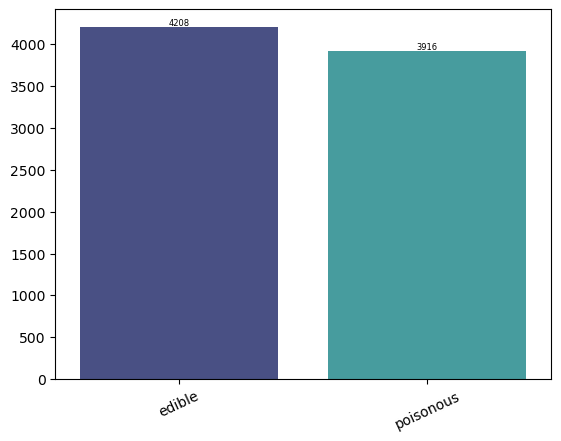

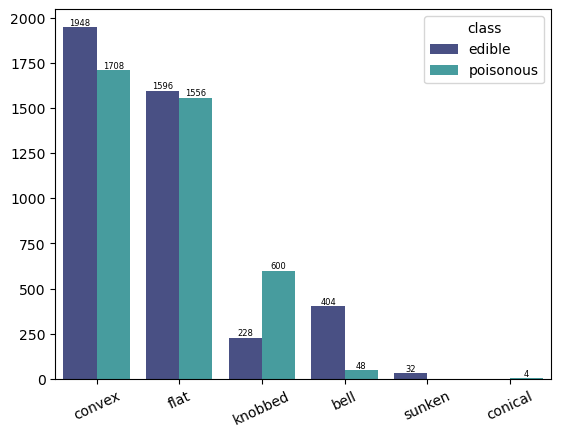

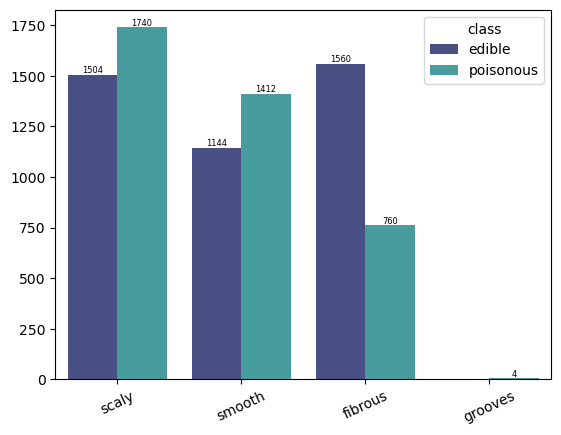

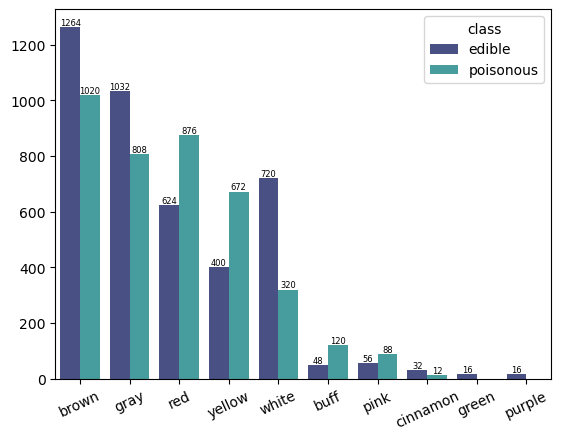

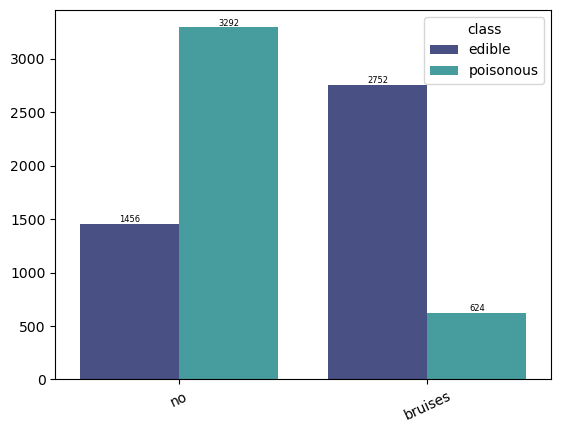

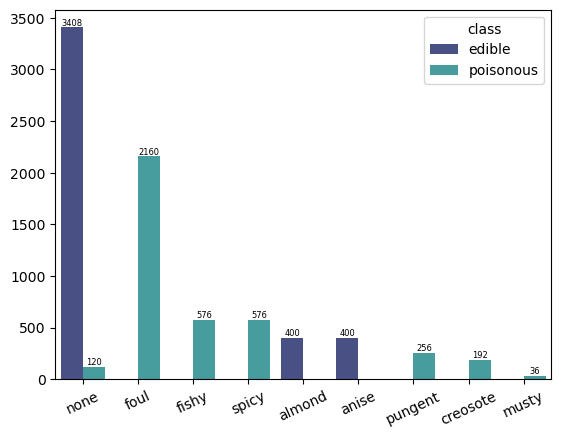

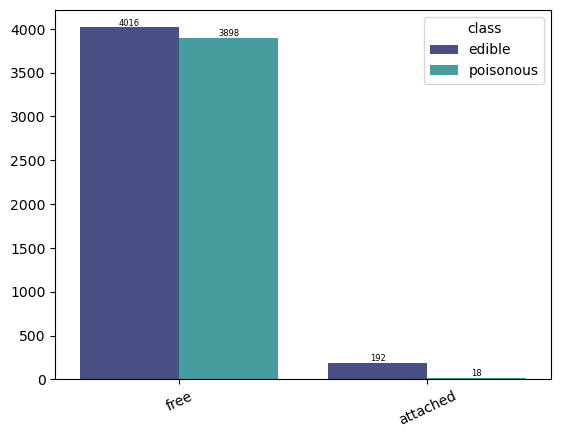

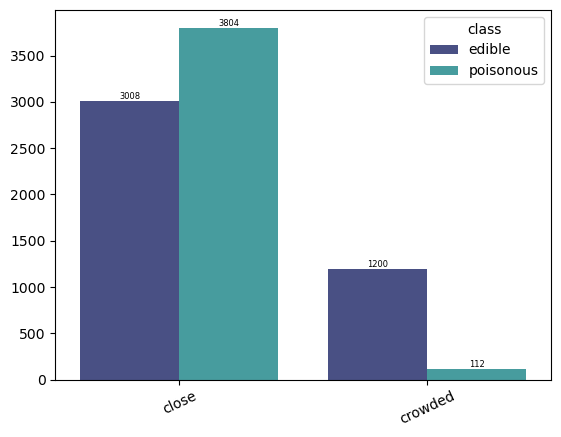

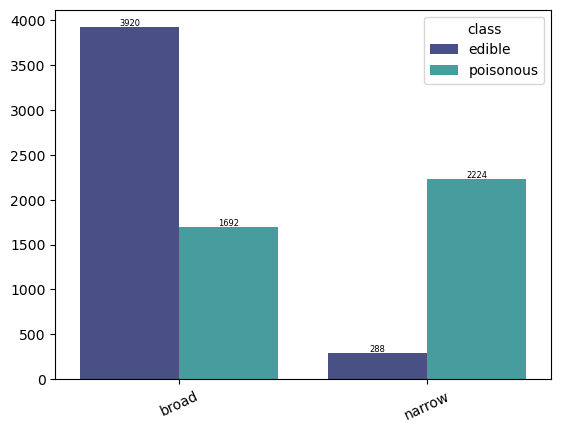

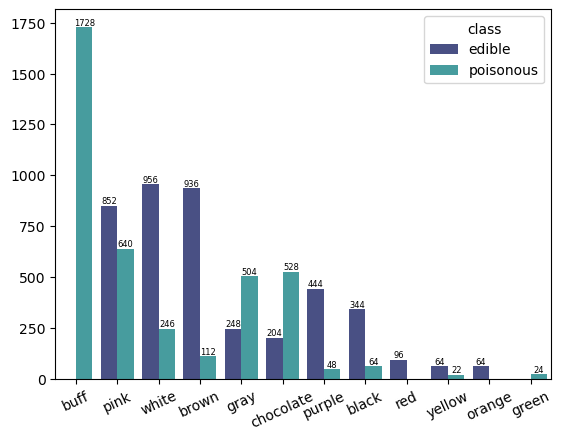

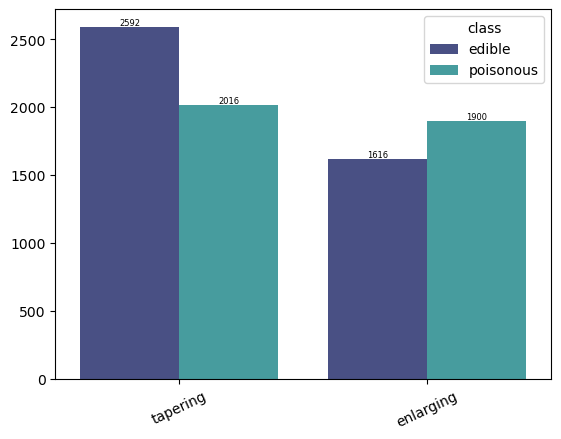

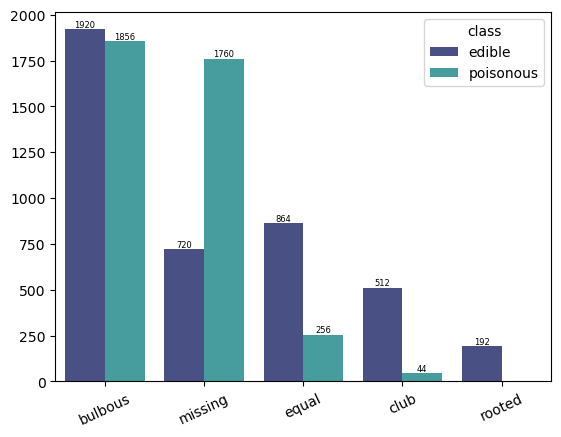

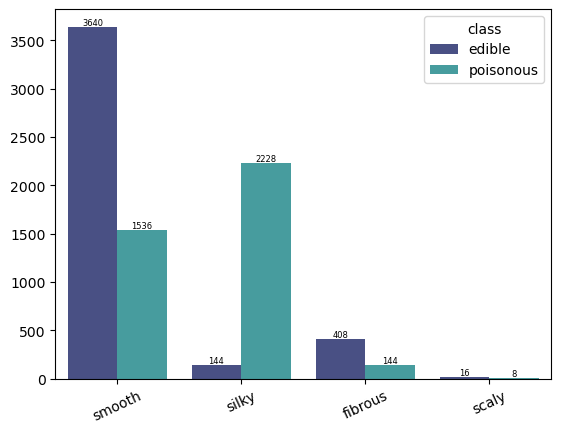

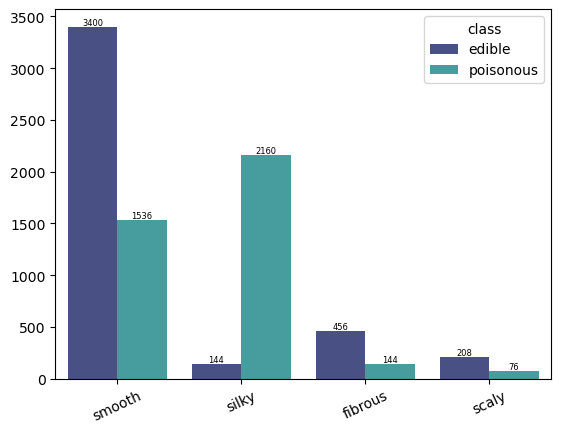

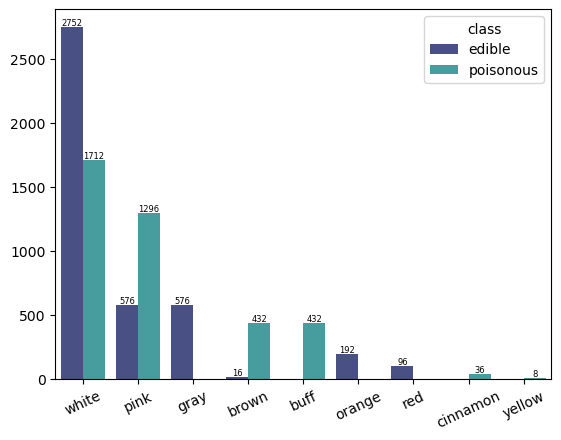

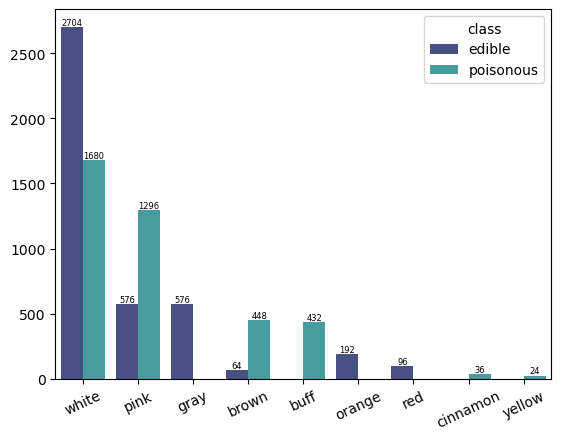

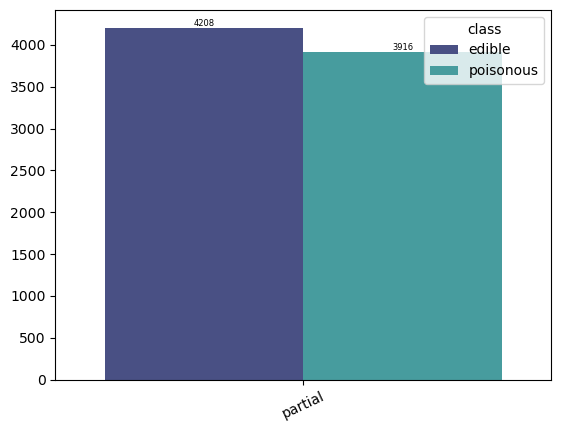

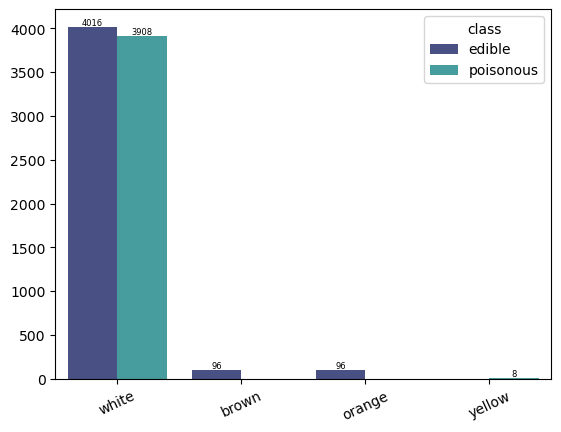

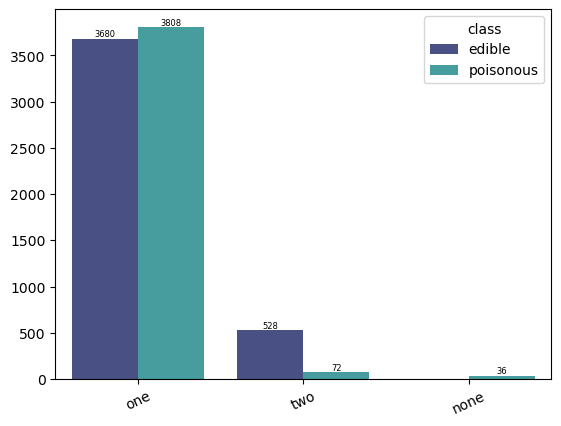

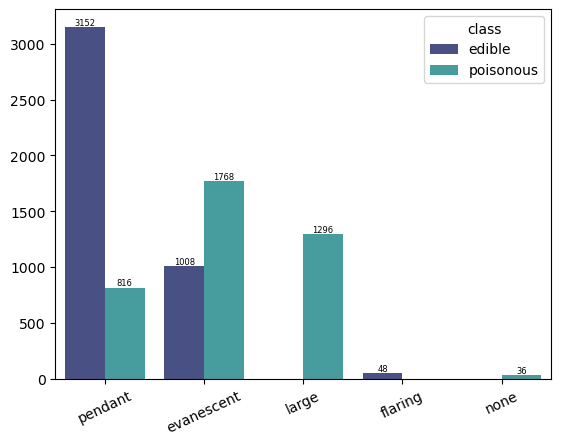

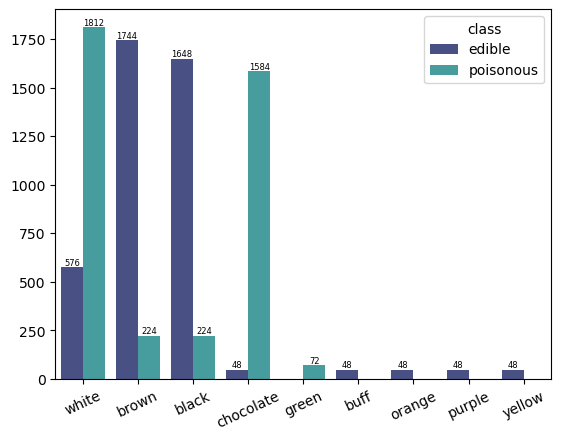

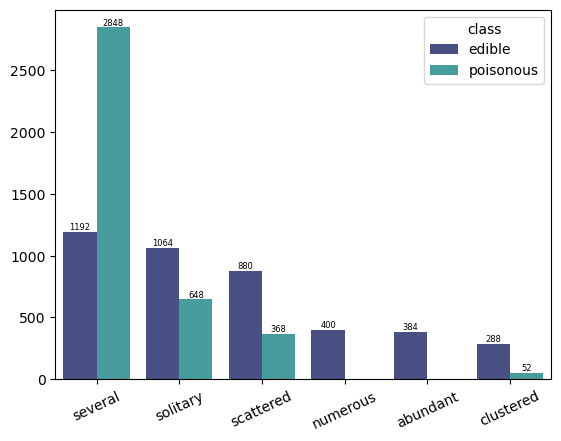

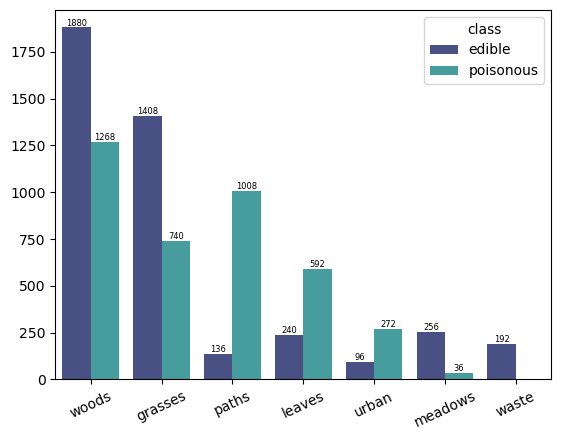

In [15]:
df['stalk root'] = df['stalk root'].replace(np.nan, 'missing') # Map NaN as "missing"
df = df.astype('category') # Change to categorical datatype

# Display and save feature plots
for i, col in enumerate(df.columns, 1): 
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue='class', palette="mako")
    for c in ax.containers:
        ax.bar_label(c, fontsize=6)
    plt.xticks(rotation=25)
    plt.xlabel(''), plt.ylabel('')
    # plt.savefig('report/plot/count/' + col + ' count.png', bbox_inches="tight")
    plt.show()

### (b) Selecting pertinent features

In [16]:
# Column breakdown
for col in df:
    pct = df[col].value_counts() / df.shape[0] * 100
    print(round(pct, 2), "\n")

class
edible       51.8
poisonous    48.2
Name: count, dtype: float64 

cap shape
convex     45.00
flat       38.80
knobbed    10.19
bell        5.56
sunken      0.39
conical     0.05
Name: count, dtype: float64 

cap surface
scaly      39.93
smooth     31.46
fibrous    28.56
grooves     0.05
Name: count, dtype: float64 

cap color
brown       28.11
gray        22.65
red         18.46
yellow      13.20
white       12.80
buff         2.07
pink         1.77
cinnamon     0.54
green        0.20
purple       0.20
Name: count, dtype: float64 

bruises
no         58.44
bruises    41.56
Name: count, dtype: float64 

odor
none        43.43
foul        26.59
fishy        7.09
spicy        7.09
almond       4.92
anise        4.92
pungent      3.15
creosote     2.36
musty        0.44
Name: count, dtype: float64 

gill attachment
free        97.42
attached     2.58
Name: count, dtype: float64 

gill spacing
close      83.85
crowded    16.15
Name: count, dtype: float64 

gill size
broad     69.08
na

In [17]:
drop_list = ['gill attachment', 'stalk shape', 'stalk root', 'stalk surface below ring', 'stalk color below ring', 'veil type', 'veil color', 'ring number']
for col in drop_list: # Drop irrelevant features
    df.drop(col, axis=1, inplace=True)

## II. Modeling the data

### (a) Encoding features for testing

In [18]:
from sklearn.model_selection import train_test_split as split
from sklearn                 import preprocessing    as pre
X, y = df.iloc[:, 1:], df.iloc[:, 0] 
X_train, X_test, y_train, y_test = split(X, y, random_state=42)

# Label encoding
label = pre.LabelEncoder()
y_train, y_test = label.fit_transform(y_train), label.fit_transform(y_test)

# One-hot encoding
hot = pre.OneHotEncoder()
hot.fit(X_train)
X_train, X_test = hot.transform(X_train).toarray(), hot.transform(X_test).toarray()

### (b) Experimenting with different models

In [19]:
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.naive_bayes  import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.tree         import DecisionTreeClassifier
from sklearn.ensemble     import RandomForestClassifier
from sklearn.dummy        import DummyClassifier

models  = [LogisticRegression(), Perceptron(), GaussianNB(), MultinomialNB(), CategoricalNB(), DummyClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]
metrics = pd.DataFrame(columns=['Model', 'Accuracy (train)', 'Accuracy (test)', 'Precision (train)', 'Precision (test)', 'Recall (train)', 'Recall (test)', 'F1 score (train)', 'F1 score (test)', 'Output'])

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
for i, model in enumerate(models, 0):
    model.fit(X_train, y_train) # Fit model on train set 
    # Generate predictions on train/test sets
    y_pred_train, y_pred_test = model.predict(X_train), model.predict(X_test)
    # Compute model metrics
    _model, model = model, str(model).split('(', 1)[0]
    acc_train,  acc_test  =  accuracy_score(y_train, y_pred_train),                   accuracy_score(y_test, y_pred_test)
    prec_train, prec_test = precision_score(y_train, y_pred_train, zero_division=1), precision_score(y_test, y_pred_test, zero_division=1)
    rec_train,  rec_test  =    recall_score(y_train, y_pred_train, zero_division=1),    recall_score(y_test, y_pred_test, zero_division=1)
    f1_train,   f1_test   =        f1_score(y_train, y_pred_train, zero_division=1),        f1_score(y_test, y_pred_test, zero_division=1)
    # Store metrics for current model
    metrics.loc[i] = [model, acc_train, acc_test, prec_train, prec_test, rec_train, rec_test, f1_train, f1_test, _model]

### (c) Evaluating model performances

In [21]:
metrics

,Model,Accuracy (train),Accuracy (test),Precision (train),Precision (test),Recall (train),Recall (test),F1 score (train),F1 score (test),Output
0,LogisticRegression,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,LogisticRegression()
1,Perceptron,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Perceptron()
2,GaussianNB,0.990153,0.984737,0.980866,0.969667,0.998974,1.000000,0.989837,0.984600,GaussianNB()
3,MultinomialNB,0.972591,0.972920,0.998915,0.996815,0.943932,0.947528,0.970645,0.971547,MultinomialNB()
4,CategoricalNB,0.960939,0.958641,0.992305,0.993471,0.925812,0.921292,0.957906,0.956021,CategoricalNB()
5,DummyClassifier,0.519941,0.512063,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,DummyClassifier()
6,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,DecisionTreeClassifier()
7,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,"(DecisionTreeClassifier(max_features='sqrt', r..."


In [22]:
# Save metrics into separate tables
model_accuracy  = metrics[['Model', 'Accuracy (train)',  'Accuracy (test)' ]].sort_values(by=['Accuracy (test)' ], ascending=False)
model_precision = metrics[['Model', 'Precision (train)', 'Precision (test)']].sort_values(by=['Precision (test)'], ascending=False)
model_recall    = metrics[['Model', 'Recall (train)',    'Recall (test)'   ]].sort_values(by=['Recall (test)'   ], ascending=False)
model_f1        = metrics[['Model', 'F1 score (train)',  'F1 score (test)' ]].sort_values(by=['F1 score (test)' ], ascending=False)

import dataframe_image as dfi
# model_accuracy.dfi.export ('report/plot/table/accuracy.png',  table_conversion='matplotlib')
# model_precision.dfi.export('report/plot/table/precision.png', table_conversion='matplotlib')
# model_recall.dfi.export   ('report/plot/table/recall.png',    table_conversion='matplotlib')
# model_f1.dfi.export       ('report/plot/table/f1.png',        table_conversion='matplotlib')

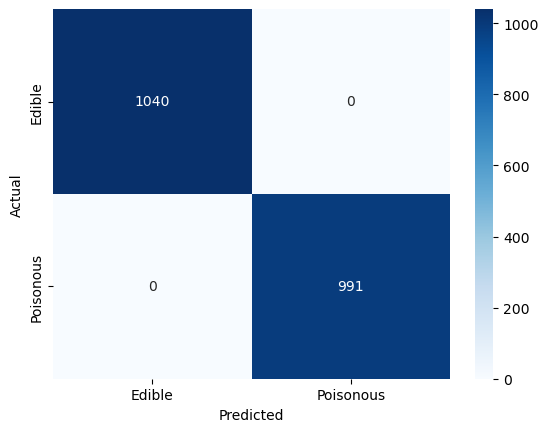

In [23]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix as conf
import operator as op
rf_model = metrics.loc[metrics['Model'] == 'RandomForestClassifier']['Output'].values[0]
sns.heatmap(conf(y_test, rf_model.predict(X_test)), annot=True, fmt='.0f', cmap='Blues',
            xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.xlabel("Predicted"), plt.ylabel("Actual")
# plt.savefig('report/plot/confusion.png', bbox_inches="tight")
plt.show()

### (d) Analyzing feature importance

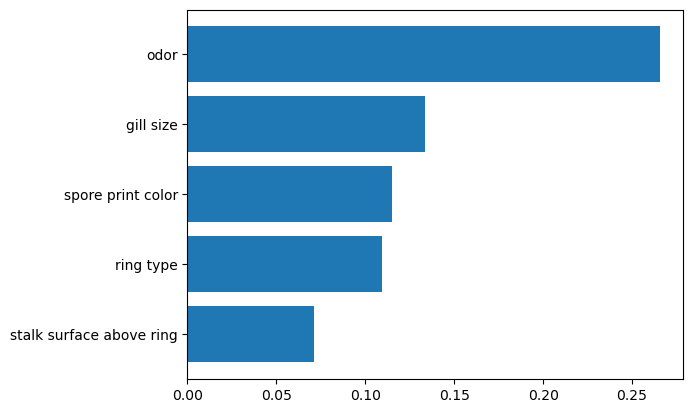

In [24]:
# Display feature importance
feat = hot.get_feature_names_out(X.columns)
idx  = rf_model.feature_importances_.argsort()
rank = {}

for i in range(0, len(rf_model.feature_importances_[idx])):
    col = feat[idx][i].split('_', 1)[0]
    val = rf_model.feature_importances_[idx][i]
    if col in rank:
        rank[col] += val
    else:
        rank[col]  = val
rank = dict(sorted(rank.items(), key=op.itemgetter(1), reverse=False))
col, val = zip(*rank.items())

plt.barh(col[-5:], val[-5:])
# plt.savefig('report/plot/importance.png', bbox_inches="tight")
plt.show()